# Meth_Comp API usage

## Import module

In [1]:
# Import main module 
from pycoMeth.Comp_Report import Comp_Report, cpg_heatmap, cpg_ridgeplot, category_barplot, chr_ideogram_plot

# optionally inport jupyter helper functions
from pycoMeth.common import head, jhelp, static_display

## Getting help

In [2]:
jhelp(Comp_Report)

**Comp_Report** (methcomp_fn, gff3_fn, ref_fasta_fn, outdir, n_top, max_tss_distance, pvalue_threshold, min_diff_llr, n_len_bin, api_mode, export_static_plots, verbose, quiet, progress, kwargs)

Generate an HTML report of significantly differentially methylated CpG intervals from `Meth_Comp` text output. Significant intervals are annotated with their closest transcript TSS.

---

* **methcomp_fn** (required) [str]

Input tsv file generated by Meth_comp (can be gzipped). At the moment only data binned by intervals with Interval_Aggregate are supported.

* **gff3_fn** (required) [str]

Path to an **ensembl GFF3** file containing genomic annotations. Only the transcripts details are extracted.

* **ref_fasta_fn** (required) [str]

Reference file used for alignment in Fasta format (ideally already indexed with samtools faidx)

* **outdir** (default: ./) [str]

Directory where to output HTML reports, By default current directory

* **n_top** (default: 100) [int]

Number of top interval candidates for which to generate an interval report. If there are not enough significant candidates this is automatically scaled down.

* **max_tss_distance** (default: 500000) [int]

Maximal distance to transcription stat site to find transcripts close to interval candidates

* **pvalue_threshold** (default: 0.01) [float]

pValue cutoff for top interval candidates

* **min_diff_llr** (default: 1) [float]

Minimal llr boundary for negative and positive median llr. 1 is recommanded for vizualization purposes.

* **n_len_bin** (default: 500) [int]

Number of genomic intervals for the longest chromosome of the ideogram figure

* **api_mode** (default: False) [bool]

Don't generate reports or tables, just parse data and return a tuple containing an overall median CpG dataframe and a dictionary of CpG dataframes for the top candidates found. These dataframes can then be used to with the plotting functions containned in this module

* **export_static_plots** (default: False) [bool]

Export all the plots from the reports in SVG format. Requires Orca to be installed (https://plotly.com/python/static-image-export/)

* **verbose** (default: False) [bool]

* **quiet** (default: False) [bool]

* **progress** (default: False) [bool]

* **kwargs**



## Example usage in interactive API mode

#### Parse data

In `api_mode` Comp_report doesn't generate any HTML reports but returns a tuple with 2 elements:
* A dataframe of median methylation values for all CpG Islands
* A list of CpG Island level methylation values ranked by ascending pvalues.

In [3]:
all_cpg_df, top_cpg_df_d  = Comp_Report (
    methcomp_fn = "./data/Medaka_CGI_meth_comp.tsv.gz",
    gff3_fn = "./data/medaka.gff3",
    ref_fasta_fn="./data/medaka.fa",
    n_top=50,
    progress=True,
    api_mode=True)

display(all_cpg_df)
display(top_cpg_df_d[1])

## Checking options and input files ##
## Loading and preparing data ##
	Loading Methcomp data from TSV file
	Loading transcripts info from GFF file
	Loading chromosome info from reference FASTA file
	Number of significant intervals found (adjusted pvalue<0.01): 3532
	Finding top candidates
## Parsing methcomp data ##
	Iterating over significant intervals
	Progress: 100%|██████████| 3.53k/3.53k [00:00<00:00, 3.67k intervals/s]


,1-308880-309181,1-503417-503927,1-514965-516003,1-570414-576486,1-623809-625652,1-727090-729031,1-729239-730182,1-1077484-1077924,1-1162762-1163132,1-1314335-1314688,...,24-21407316-21407672,24-22058632-22059037,24-22331849-22332483,24-22382403-22382773,24-22452449-22452848,24-22584245-22584601,24-22760710-22761123,24-22892617-22893113,24-23134697-23135071,24-23191101-23191433
Sample 11-1_A3,0.655,2.598,-2.230,NaN,-0.968,1.255,-2.085,4.352,2.855,-2.058,...,0.090,-0.195,3.020,-0.055,2.935,-0.058,0.220,1.760,-1.502,1.797
Sample 117-2_C4,-1.875,1.795,-3.225,0.660,-0.265,0.810,-3.300,1.758,3.080,2.130,...,-0.010,-1.902,3.555,0.770,-3.710,-2.742,2.210,1.220,0.880,1.655
Sample 131-1_F4,0.570,1.522,1.200,1.628,0.095,1.995,-1.792,3.035,0.340,1.985,...,0.550,-1.185,3.108,1.440,2.270,NaN,0.900,NaN,0.965,2.100
Sample 134-1_H4,-1.152,-1.142,1.265,1.518,-1.925,1.760,NaN,0.872,0.590,-3.310,...,2.705,-1.322,3.278,0.730,3.915,2.805,1.205,1.030,1.545,2.418
Sample 134-2_A5,2.145,-5.395,3.050,1.638,3.125,1.705,-3.133,-3.960,-2.475,1.635,...,-0.205,-0.692,3.980,0.150,3.400,-2.365,1.625,1.785,0.615,2.260
Sample 4-1_B2,-2.920,1.735,0.505,1.078,-2.240,2.370,-1.055,-0.088,0.810,-2.108,...,0.390,-0.050,4.110,-0.360,2.570,1.990,1.950,0.720,1.420,1.705
Sample 4-2_B2,-0.405,1.490,3.020,1.652,-0.575,2.082,-0.225,-0.100,1.480,-1.370,...,-1.270,-1.770,3.710,1.100,2.810,-0.085,-0.280,0.310,-0.875,1.225
Sample 69-1_F3,-2.050,2.613,-3.270,-1.743,-0.040,1.418,-2.395,-3.150,-2.500,-1.290,...,0.350,-1.550,3.102,0.980,2.740,-2.300,-1.150,1.420,2.455,2.155
Sample 7-1_E2,-3.812,2.872,-3.490,0.940,0.913,2.600,2.105,2.132,4.380,-0.118,...,-1.795,-0.140,3.608,-1.430,2.730,3.865,2.110,0.525,1.700,-0.855
Sample 7-2_F2,-2.412,1.152,2.880,0.645,-0.555,-3.302,-3.225,NaN,-0.220,-0.510,...,0.295,0.190,3.552,0.300,NaN,2.640,2.190,-1.225,0.778,-1.340


,"15-13,014,749","15-13,014,782","15-13,014,816","15-13,014,843","15-13,014,876","15-13,014,892","15-13,014,924","15-13,014,942","15-13,014,970","15-13,015,026",...,"15-13,015,535","15-13,015,568","15-13,015,587","15-13,015,618","15-13,015,629","15-13,015,651","15-13,015,671","15-13,015,693","15-13,015,739","15-13,015,768"
Sample 11-1_A3,-1.510,-2.730,-5.460,-0.320,-3.330,-7.600,-1.490,-2.210,-1.690,-1.290,...,-10.740,-3.065,-7.785,-1.520,-2.795,-1.630,-2.330,-3.350,-1.90,-2.180
Sample 117-2_C4,-1.775,-1.010,-3.160,0.030,1.120,4.520,2.840,3.990,6.885,0.290,...,5.800,1.040,2.290,0.880,0.430,2.140,-0.290,-0.830,-0.13,0.600
Sample 131-1_F4,-1.210,-3.400,-4.310,-0.810,-0.995,-13.525,0.300,-1.740,-4.870,-2.110,...,-13.535,-2.915,-9.220,-1.485,-4.485,-1.825,-2.885,-3.995,-2.57,-4.330
Sample 134-1_H4,-2.875,-4.845,-4.020,-0.845,-4.675,-7.845,-0.065,-2.525,-3.125,-0.555,...,-7.200,-2.500,-5.920,0.140,-2.160,-0.450,-1.220,-1.830,-0.54,-1.980
Sample 134-2_A5,-0.500,3.230,-3.220,0.000,3.620,7.900,2.180,4.380,3.160,1.570,...,8.830,1.700,3.860,2.405,1.475,2.860,1.765,1.600,1.69,1.820
Sample 4-1_B2,0.260,2.495,-1.880,0.300,3.320,8.535,1.705,4.885,3.455,0.955,...,5.870,2.100,4.860,2.010,1.030,2.770,1.310,2.410,1.28,2.410
Sample 4-2_B2,-1.970,0.505,-2.420,0.110,1.190,3.450,2.625,4.380,3.435,1.700,...,6.680,1.790,3.940,1.670,0.760,1.550,1.830,0.520,1.18,3.340
Sample 69-1_F3,-2.430,0.020,-2.600,-0.130,1.860,6.345,1.730,5.235,4.125,0.025,...,8.190,2.450,3.190,1.000,0.950,1.420,1.820,1.160,0.01,3.785
Sample 7-1_E2,-3.430,-4.350,-5.180,-0.550,-4.310,-8.240,-0.350,-2.850,-4.790,-1.220,...,-12.670,-2.820,-9.330,-0.650,-3.940,-1.580,-3.190,-3.770,-2.29,-2.780
Sample 7-2_F2,-0.730,-4.290,-4.080,-0.370,-2.230,-4.420,-1.340,-3.200,-5.140,-0.150,...,-11.875,-2.710,-8.000,-2.305,-2.140,-1.350,-2.120,-2.890,-1.61,-0.890


### Plotting functions

#### cpg_heatmap

Can be used at both genome scale (all_cpg_df) or individual CpG island (top_cpg_df_d) 

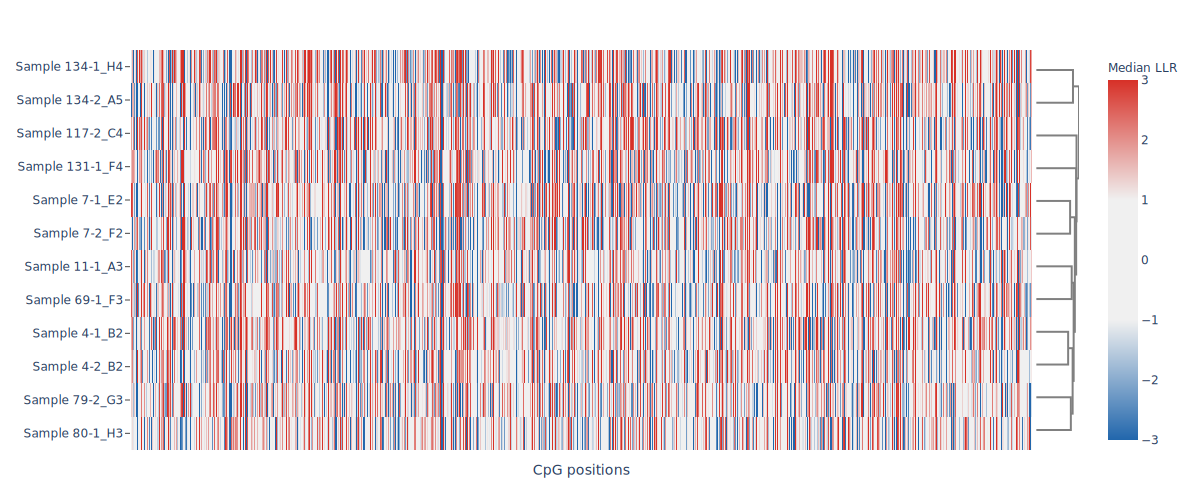

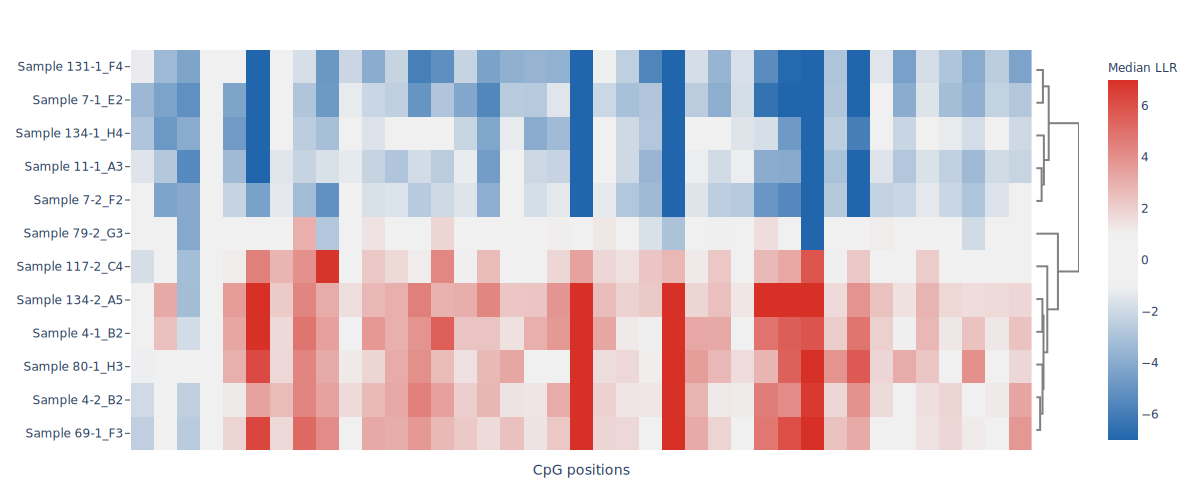

In [4]:
static_display(cpg_heatmap(all_cpg_df, lim_llr=3), width=1200)
static_display(cpg_heatmap(top_cpg_df_d[1], lim_llr=7), width=1200)

#### cpg_ridgeplot

Can be used at both genome scale (all_cpg_df) or individual CpG island (top_cpg_df_d)

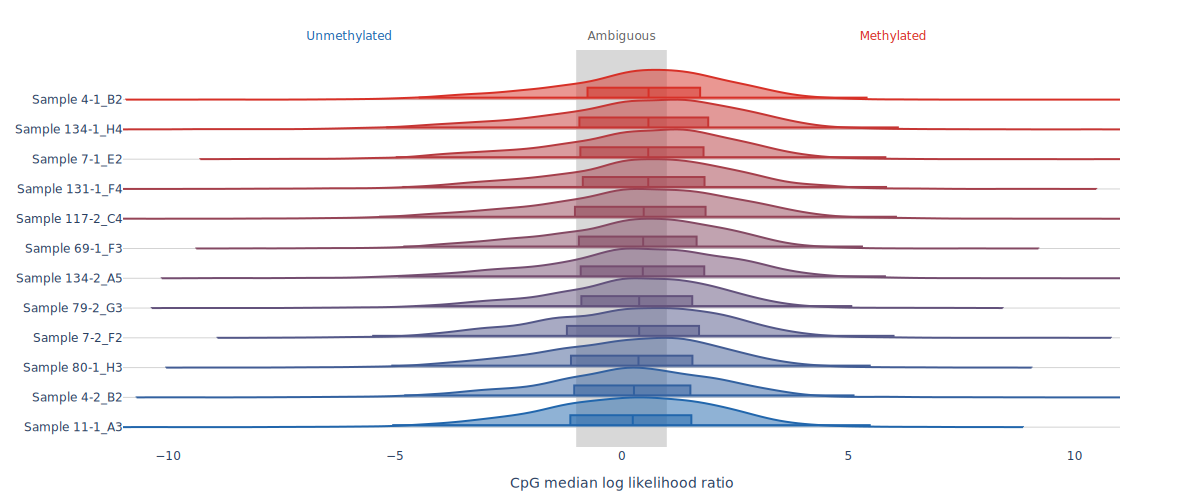

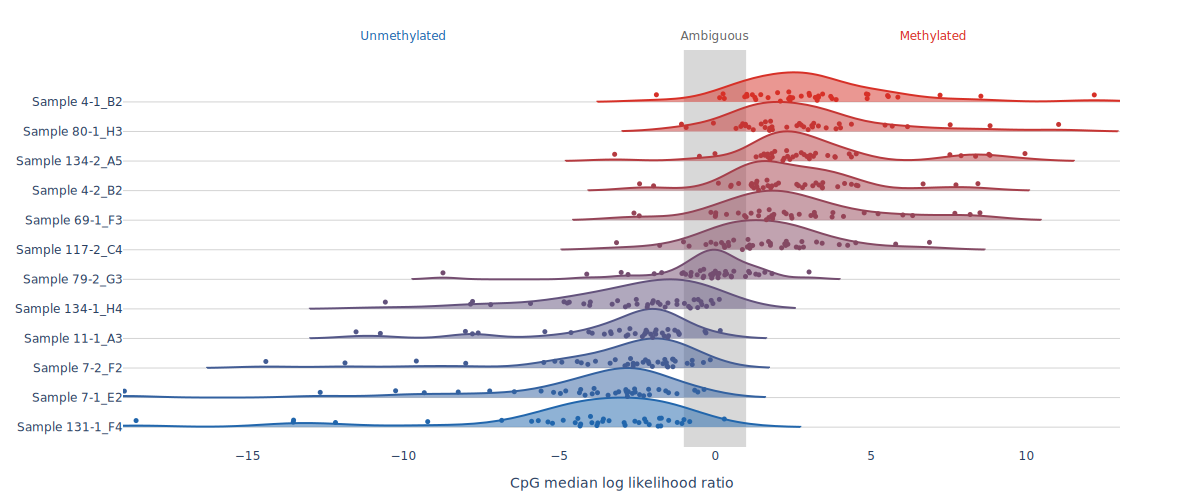

In [5]:
static_display(cpg_ridgeplot(all_cpg_df, box=True, scatter=False), width=1200)
static_display(cpg_ridgeplot(top_cpg_df_d[1]), width=1200)

#### category_barplot

Can be used at both genome scale (all_cpg_df) or individual CpG island (top_cpg_df_d)

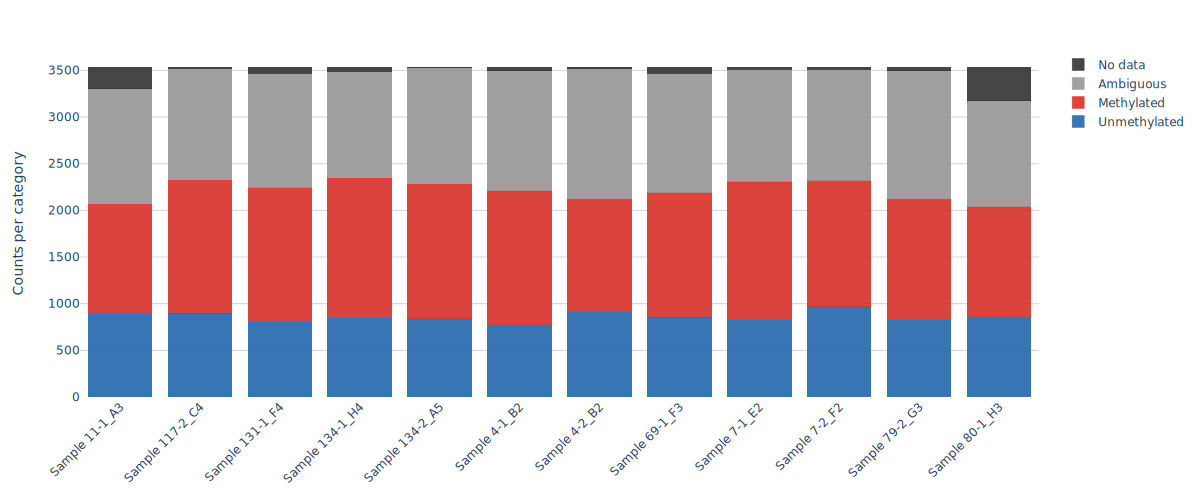

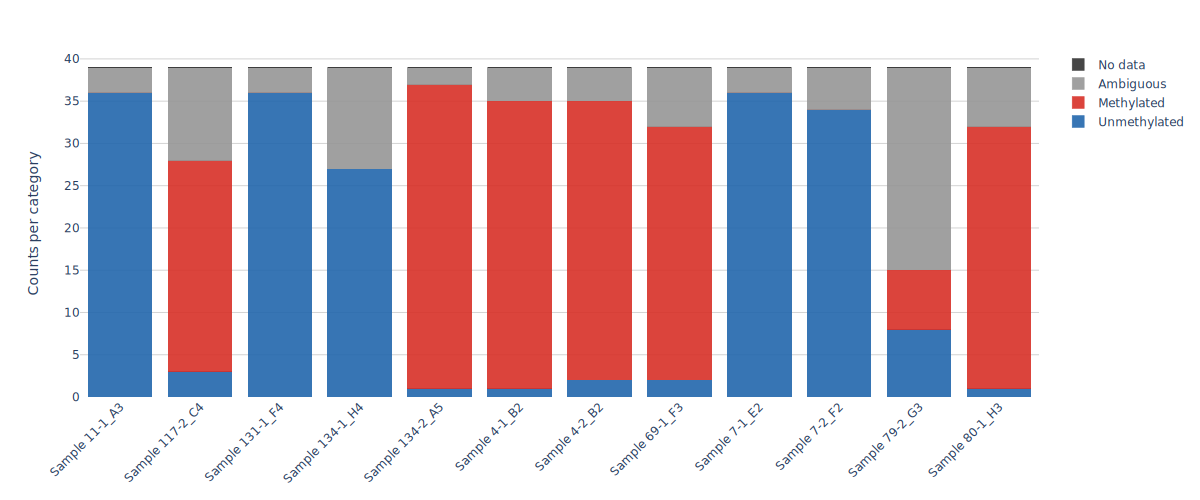

In [6]:
static_display(category_barplot(all_cpg_df), width=1200)
static_display(category_barplot(top_cpg_df_d[1]), width=1200)

#### chr_ideogram_plot

Can only be used at genome scale and requires to provide the reference fasta file

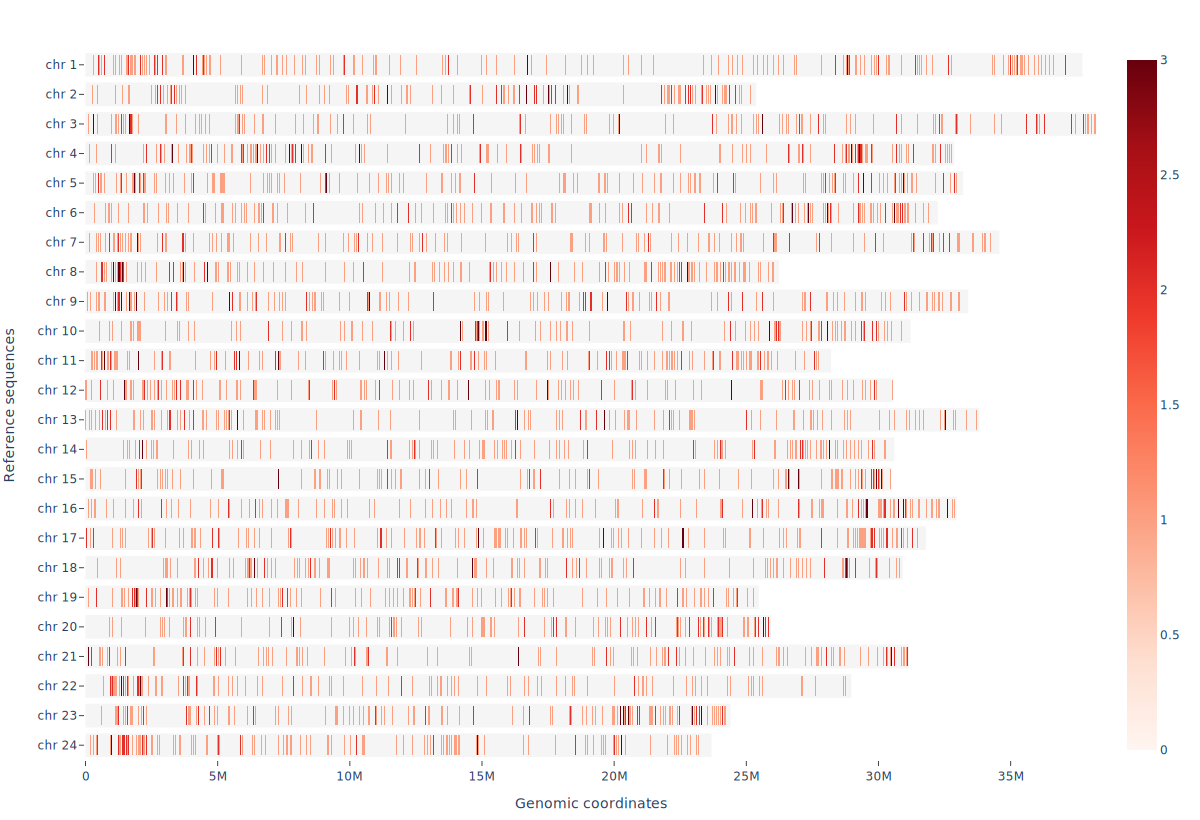

In [7]:
static_display(chr_ideogram_plot(all_cpg_df, ref_fasta_fn="./data/medaka.fa"), width=1200)

## Example usage in report mode

#### Example with a single significant result

In [8]:
Comp_Report (
    methcomp_fn = "./data/Yeast_CGI_meth_comp.tsv.gz",
    gff3_fn = "./data/yeast.gff3",
    ref_fasta_fn="./data/yeast.fa",
    outdir = "yeast_html",
    pvalue_threshold = 0.05,
    verbose=True)

## Checking options and input files ##
	[DEBUG]: Options summary
	[DEBUG]: 	Package name: pycoMeth
	[DEBUG]: 	Package version: 0.4.7
	[DEBUG]: 	Timestamp: 2020-07-09 14:21:54.832500
	[DEBUG]: 	methcomp_fn: ./data/Yeast_CGI_meth_comp.tsv.gz
	[DEBUG]: 	gff3_fn: ./data/yeast.gff3
	[DEBUG]: 	ref_fasta_fn: ./data/yeast.fa
	[DEBUG]: 	outdir: yeast_html
	[DEBUG]: 	n_top: 100
	[DEBUG]: 	max_tss_distance: 500000
	[DEBUG]: 	pvalue_threshold: 0.05
	[DEBUG]: 	min_diff_llr: 1
	[DEBUG]: 	n_len_bin: 500
	[DEBUG]: 	api_mode: False
	[DEBUG]: 	export_static_plots: False
	[DEBUG]: 	verbose: True
	[DEBUG]: 	quiet: False
	[DEBUG]: 	progress: False
	[DEBUG]: 	kwargs
## Loading and preparing data ##
	Loading Methcomp data from TSV file
	Loading transcripts info from GFF file
	Loading chromosome info from reference FASTA file
	Number of significant intervals found (adjusted pvalue<0.05): 1
ERROR: Low number of significant sites. The summary report will likely contains errors
ERROR: Number of significant inter

#### Usage with large dataset, including static plot export (requires plotly Orca)

In [9]:
Comp_Report (
    methcomp_fn = "./data/Medaka_CGI_meth_comp.tsv.gz",
    gff3_fn = "./data/medaka.gff3",
    ref_fasta_fn="./data/medaka.fa",
    outdir = "medaka_html",
    export_static_plots=True,
    n_top=50,
    progress=True)

## Checking options and input files ##
## Loading and preparing data ##
	Loading Methcomp data from TSV file
	Loading transcripts info from GFF file
	Loading chromosome info from reference FASTA file
	Number of significant intervals found (adjusted pvalue<0.01): 3532
	Finding top candidates
	Creating output directory structure
	Computing source md5
## Parsing methcomp data ##
	Iterating over significant intervals
	Progress: 100%|██████████| 3.53k/3.53k [00:20<00:00, 172 intervals/s] 
	Generating summary report
